___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import pandas as pd     
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

#### Load Dataset

In [18]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [19]:
df.columns = ['CustomerID', 'Gender','Age','Income','Spend_Score']

In [20]:
df.head()

,CustomerID,Gender,Age,Income,Spend_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerID   200 non-null    int64 
 1   Gender       200 non-null    object
 2   Age          200 non-null    int64 
 3   Income       200 non-null    int64 
 4   Spend_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df.head()

,CustomerID,Gender,Age,Income,Spend_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Gender,200.0,0.44,0.497633,0.0,0.00,0.0,1.00,1.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spend_Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [24]:
df.isnull().sum().any()

False

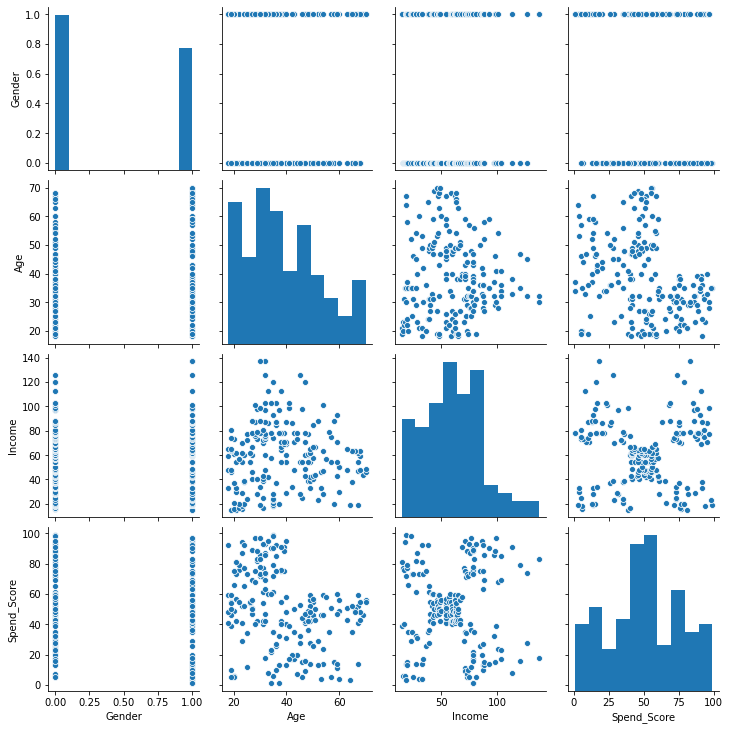

In [25]:
sns.pairplot(df.drop('CustomerID', axis = 1));

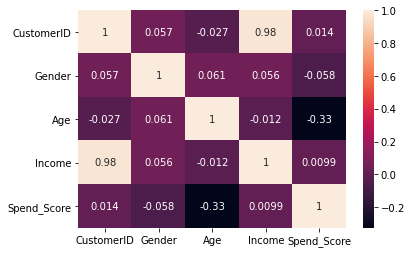

In [30]:
sns.heatmap(df.corr(), annot = True);

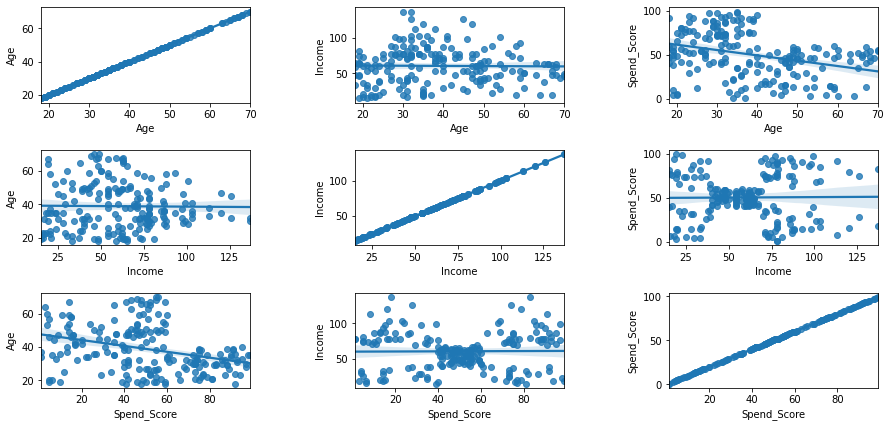

In [31]:
plt.figure(1 , figsize = (15 , 7))
n = 0
for x in ['Age' , 'Income' , 'Spend_Score']:
    for y in ['Age' , 'Income' , 'Spend_Score']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show();

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

In [26]:
from pyclustertend import hopkins
hopkins(df, df.shape[0])

0.1665357255264254

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [27]:
df1=df[['Age', 'Spend_Score']]

In [28]:
from pyclustertend import hopkins
hopkins(df1, df1.shape[0])

0.3134072572932715

#### *ii. Determine optimal number of clusters*

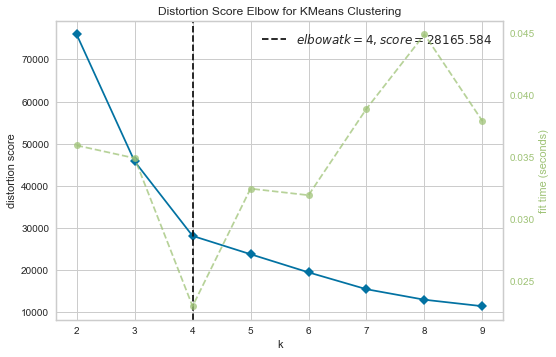

In [32]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(df1)
visu.poof();

#### *iii. Apply K Means*

In [40]:
k_means1 =KMeans(n_clusters=4).fit(df1)
labels1 = k_means1.labels_
df1['cluster_id'] = labels1
df1.head()

,Age,Spend_Score,cluster_id
0,19,39,3
1,21,81,1
2,20,6,0
3,23,77,1
4,31,40,3


In [41]:
from sklearn.metrics import silhouette_samples,silhouette_score
print(f'Silhouette Score(n=4): {silhouette_score(df1, labels1)}')

Silhouette Score(n=4): 0.5008169782556672


#### *iv. Visualizing and Labeling All the Clusters*

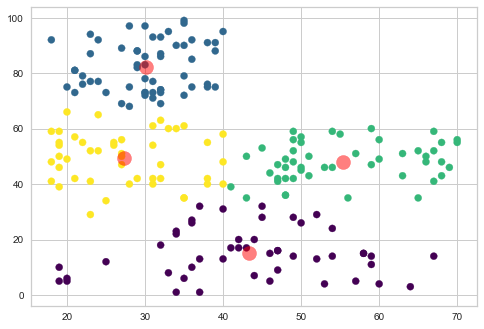

In [42]:
plt.scatter(df1.iloc[:,0], df1.iloc[:,1], c = labels1, s = 50, cmap = "viridis")
plt.scatter(k_means1.cluster_centers_[:, 0], k_means1.cluster_centers_[:, 1], s=200, c='red',alpha=0.5, label = 'Centroids');

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [43]:
df2=df[['Income', 'Spend_Score']]

#### *ii. Determine optimal number of clusters*

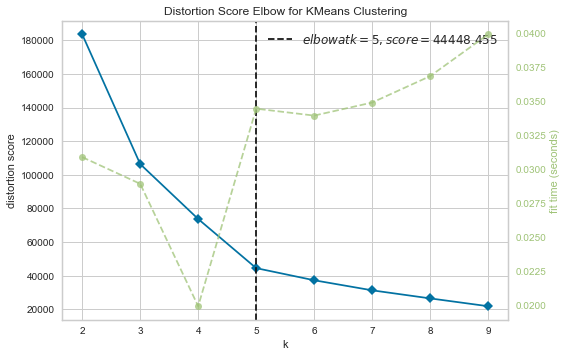

In [44]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(df2)
visu.poof();

#### *iii. Apply K Means*

In [45]:
k_means2 =KMeans(n_clusters=5).fit(df2)
labels2 = k_means2.labels_
df2['cluster_id'] = labels2
df2.head()

,Income,Spend_Score,cluster_id
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3


In [46]:
from sklearn.metrics import silhouette_samples,silhouette_score
print(f'Silhouette Score(n=5): {silhouette_score(df2, labels2)}')

Silhouette Score(n=5): 0.5546462899055752


#### *iv. Visualizing and Labeling All the Clusters*

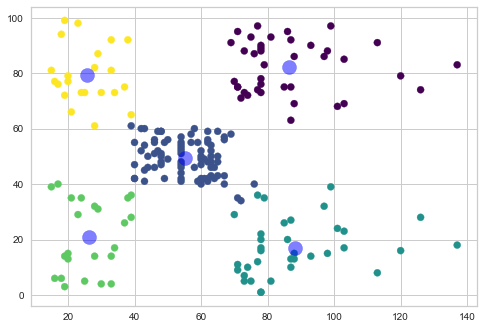

In [47]:
plt.scatter(df2.iloc[:,0], df2.iloc[:,1], c = labels2, s = 50, cmap = "viridis")
plt.scatter(k_means2.cluster_centers_[:, 0], k_means2.cluster_centers_[:, 1], s=200, c='blue',alpha=0.5, label = 'Centroids');

In [48]:
df3=df[['Age', 'Income', 'Spend_Score']]
df3.head()

,Age,Income,Spend_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [52]:
from pyclustertend import hopkins
hopkins(df3, df3.shape[0])

0.3139882553625088

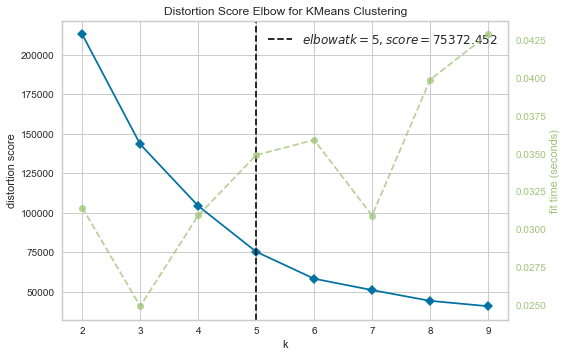

In [49]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(df3)
visu.poof();

In [50]:
k_means3 =KMeans(n_clusters=5).fit(df3)
labels3 = k_means3.labels_
df3['cluster_id'] = labels3
df3.head(15)

,Age,Income,Spend_Score,cluster_id
0,19,15,39,3
1,21,15,81,2
2,20,16,6,3
3,23,16,77,2
4,31,17,40,3
5,22,17,76,2
6,35,18,6,3
7,23,18,94,2
8,64,19,3,3
9,30,19,72,2


In [51]:
from sklearn.metrics import silhouette_samples,silhouette_score
print(f'Silhouette Score(n=5): {silhouette_score(df3, labels3)}')

Silhouette Score(n=5): 0.4456425939510818


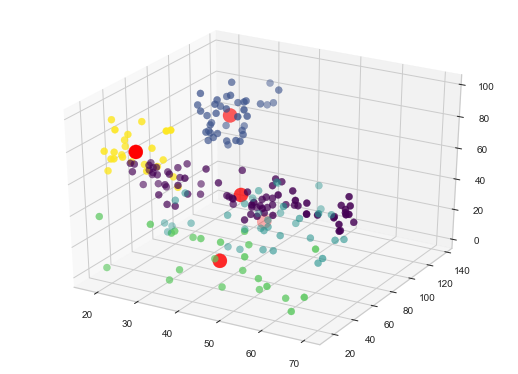

In [53]:
from mpl_toolkits.mplot3d import Axes3D
kmeans= KMeans(n_clusters=5).fit(df3)
clusters= kmeans.labels_
centers = kmeans.cluster_centers_

plt.rcParams["figure.figsize"] =(7,5)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df3.iloc[:,0],df3.iloc[:,1],df3.iloc[:,2],c = clusters, s = 50,cmap = "viridis")
ax.scatter(centers[:,0],centers[:,1],centers[:,2],c="red",marker="o",s = 200);

In [55]:
!pip install plotly
import plotly.graph_objs as go

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=588287066ae658f04f1a485b62bde98b0a5e9b9ec88429208e75a238f8555da0
  Stored in directory: c:\users\sedat\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [62]:
import plotly as py

In [68]:
py.offline.init_notebook_mode(connected = True)
df3['cluster_id'] =  k_means3.labels_
trace1 = go.Scatter3d(
    x = df3['Age'],
    y = df3['Spend_Score'],
    z = df3['Income'],
    mode ='markers',
    marker = dict(color = df3['cluster_id'], size = 10, line = dict(color= df3['cluster_id'], width= 8), opacity = 0.8)) 
data = [trace1]
layout = go.Layout(title= 'Customers\' Segmentation', scene = dict(xaxis = dict(title  = 'Age'), 
                                                   yaxis = dict(title  = 'Spending Score (1-100)'), 
                                                   zaxis = dict(title  = 'Annual Income (k$)')))
fig = go.Figure(data = data, layout=layout)
py.offline.iplot(fig)
plt.show();

### Hierarchical Clustering

#### *i. Determine optimal number of clusters using Dendogram*

In [56]:
df4=df[['Age', 'Income', 'Spend_Score']]
df4.head()

,Age,Income,Spend_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [58]:
from scipy.cluster.hierarchy import linkage, dendrogram
hc_complete =  linkage(df4,"complete")
hc_ward = linkage(df4, "ward")

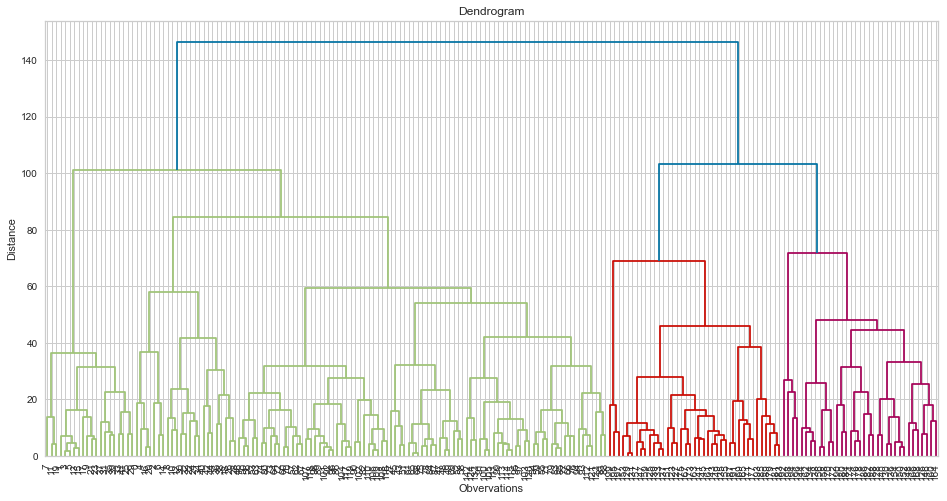

In [59]:
plt.figure(figsize = (16,8))
plt.title("Dendrogram")
plt.xlabel("Obvervations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10);

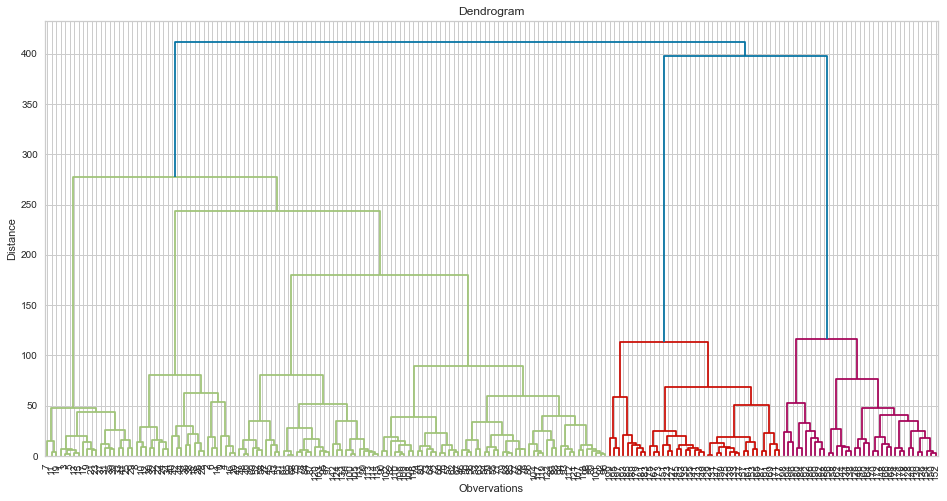

In [69]:
plt.figure(figsize = (16,8))
plt.title("Dendrogram")
plt.xlabel("Obvervations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);

#### ii. *Apply Agglomerative Clustering*

In [70]:
from sklearn.cluster import AgglomerativeClustering
model_ais = AgglomerativeClustering(n_clusters = 5,affinity='euclidean',linkage='ward')
model_ais.fit_predict(df4)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

In [71]:
model_ais.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

In [72]:
from sklearn.metrics import silhouette_samples,silhouette_score
print(f'Silhouette Score(n=5): {silhouette_score(df4, model_ais.labels_)}')

Silhouette Score(n=5): 0.4401889024290193


#### iii. *Visualizing and Labeling All the Clusters* 

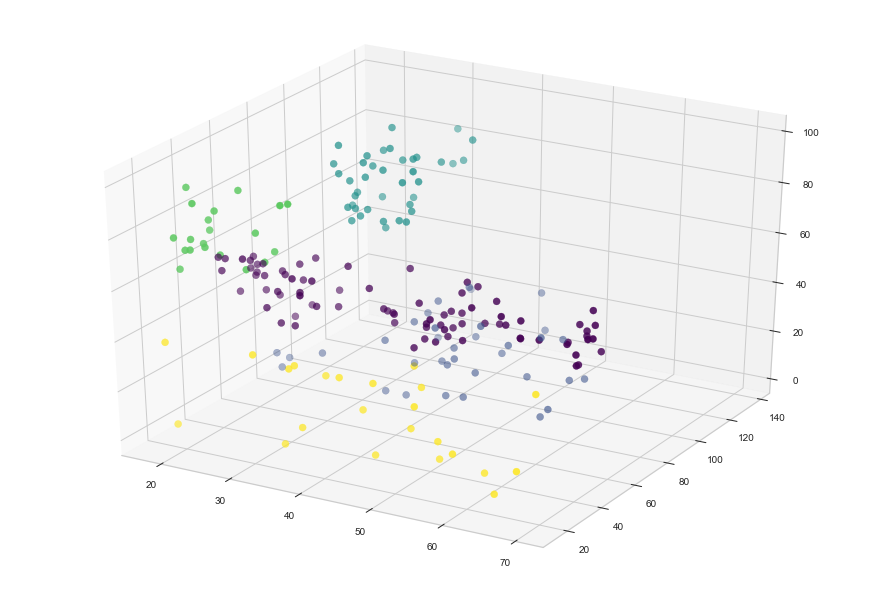

In [73]:
from mpl_toolkits.mplot3d import Axes3D
model_ais = AgglomerativeClustering(n_clusters = 5,affinity='euclidean',linkage='ward')
model_ais.fit_predict(df4)
clusters= model_ais.labels_
centers = model_ais.n_clusters

plt.rcParams["figure.figsize"] =(12,8)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df4.iloc[:,0],df4.iloc[:,1],df4.iloc[:,2],c = clusters, s = 50,cmap = "viridis");

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___